In [13]:
from datastructures.rendering import generate_incidence_matrix, plot_incidence_matrix, plt

In [21]:
plt.rcParams['text.usetex'] = True

In [54]:
Ein = {0:tuple(), 1: (0,2,3), 2: (1,), 3:(0,1,2)}
Eout = {0:(0,), 1: (1,), 2: (2,), 3:(3,)}

In [55]:
sequence = [0,1,2,3]

In [56]:
A = generate_incidence_matrix(Ein, Eout, sequence, sequence)

In [57]:
A = np.diag([0.5]*4)

In [58]:
A

array([[0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0.5]])

In [59]:
ADSM = A.transpose()

In [34]:
import numpy as np
def plot_incidence_matrix(A, column_labels, row_labels, pad=None, **kwargs):
    fontsize = kwargs.get('fontsize', 16)
    fig, ax = plt.subplots(figsize=kwargs.get('figsize',None))
    ax.pcolormesh(A, cmap='Greys', edgecolors='k', linewidth=1, vmin=0, vmax=1.2)
    xtickidx, xtags = zip(*enumerate(column_labels))
    kwargs = {'ha': 'left'} if pad else dict()
    plt.xticks(np.array(xtickidx)+0.5, xtags, rotation = 0, fontsize=fontsize, **kwargs)
    ax.xaxis.tick_top()
    ytickidx, ytags = zip(*enumerate(row_labels))
    ytickargs = {'ha':'left'} if pad else dict()
    plt.yticks(np.array(ytickidx)+0.5, ytags, fontsize=fontsize, **ytickargs);
    ax.invert_yaxis()
    ax.set_aspect('equal')
    if pad:
        yax = ax.get_yaxis()
        yax.set_tick_params(pad=pad)
    return fig, ax

In [ ]:
compnames = ['A','B','C','D']

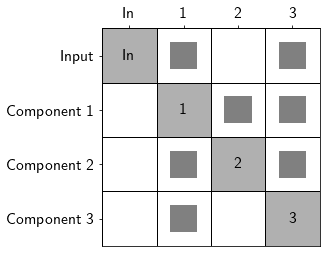

In [65]:
column_labels = ['In']+[r'{}'.format(idx) for idx in sequence[1:]]
row_labels = ['Input'] + [r'Component {}'.format(idx) for idx in sequence[1:]]
fig, ax =plot_incidence_matrix(A, column_labels, row_labels)
for x in sequence:
    plt.text(x + 0.5, x + 0.5, column_labels[x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=16
                     )
for idx, fxid in enumerate(sequence):
        varsineq = Ein[fxid]+tuple(elt for elt in Eout[fxid] if elt is not None)
        for var in varsineq:
            col = sequence.index(var)
            if var not in Eout[fxid]:
                rectangle = plt.Rectangle((idx + 0.25,col + 0.25), 0.5, 0.5, fc='gray')
                plt.gca().add_patch(rectangle)
plt.savefig('dsm_example.png', dpi=200, bbox_inches='tight')